# False Position Method (Regula Falsi)

The False Position Method is similar to the Bisection Method but uses linear interpolation to find the next approximation instead of taking the midpoint.

**Formula:** c = (a×f(b) - b×f(a)) / (f(b) - f(a))

**Advantages:**
- Often converges faster than Bisection
- Guaranteed convergence when conditions are met

In [ ]:
import math
import matplotlib.pyplot as plt

In [ ]:
f = lambda x: x**3 - 4*x + 1

def false_position(a, b, tol, n):
    if f(a) * f(b) >= 0:
        print("False Position method fails. f(a) and f(b) must have opposite signs.")
        return None

    print("Iteration\t a\t\t b\t\t c\t\t f(c)")
    i = 1
    c_old = a  
    c_values = []  # store root approximations for plotting
    
    while i <= n:
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        c_values.append(c)
        print(f"{i}\t\t {a:.6f}\t {b:.6f}\t {c:.6f}\t {f(c):.6f}")
        
        if abs(f(c)) < tol or abs(c - c_old) < tol:
            print("\nConverged!")
            break
        
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        
        c_old = c
        i += 1

    print("\nApproximate root:", c)
    return c, c_values

In [ ]:
# Example usage
a = 0
b = 1
tol = 1e-5
n = 100

root, c_values = false_position(a, b, tol, n)

Finding root of f(x) = x³ - 4x + 1 using False Position Method
Initial interval: [0, 1]
f(0) = 1.000000
f(1) = -2.000000

Iteration	 a		 b		 c		 f(c)		 Error
--------------------------------------------------------------------------------
  1		 0.000000	 1.000000	 0.333333	 -0.296296	 1.00e+00
  2		 0.000000	 0.333333	 0.257143	 -0.011569	 7.62e-02
  3		 0.000000	 0.257143	 0.254202	 -0.000382	 2.94e-03
  4		 0.000000	 0.254202	 0.254105	 -0.000013	 9.71e-05
  5		 0.000000	 0.254105	 0.254102	 -0.000000	 3.19e-06

Converged after 5 iterations!

Approximate root: x = 0.25410180


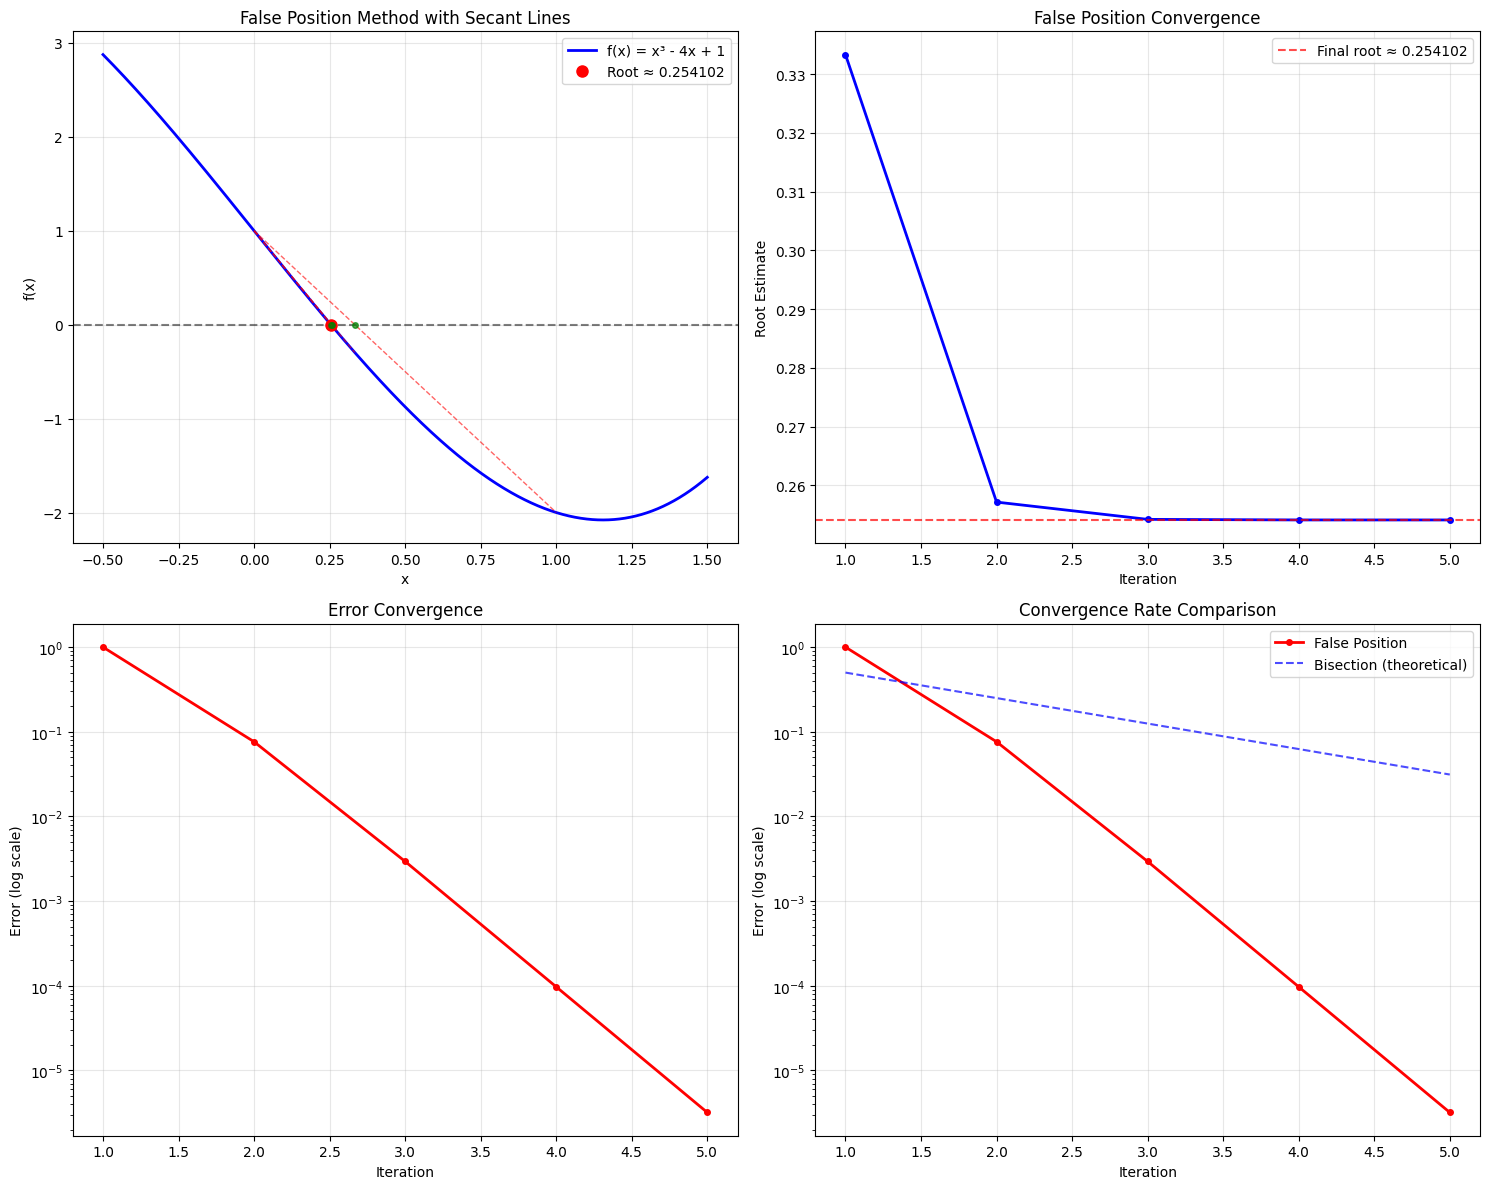

In [ ]:
# Plotting convergence
plt.figure(figsize=(8,5))
plt.plot(range(1, len(c_values)+1), c_values, 'bo-', markersize=5)
plt.axhline(y=root, color='r', linestyle='--', label=f'Converged root ≈ {root:.6f}')
plt.xlabel('Iteration')
plt.ylabel('c (root estimate)')
plt.title('False Position Method Convergence')
plt.grid(True)
plt.legend()
plt.show()